In [1]:
import librosa
from librosa import display
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
path = '/kaggle/input/audio-emotions/Emotions'
lst = []
i = -2
start_time = time.time()

for subdir, dirs, files in os.walk(path):
  i=i+1
  print(subdir)
  print(i)
  for file in files:

        #Load librosa array, obtain mfcss, add them to array and then to list.
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_fft=4096, hop_length=256, n_mfcc=40).T,axis=0) 
        arr = mfccs, i
        lst.append(arr) #Here we append the MFCCs to our list.

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

/kaggle/input/audio-emotions/Emotions
-1
/kaggle/input/audio-emotions/Emotions/Suprised
0
/kaggle/input/audio-emotions/Emotions/Fearful
1
/kaggle/input/audio-emotions/Emotions/Disgusted
2
/kaggle/input/audio-emotions/Emotions/Angry
3
/kaggle/input/audio-emotions/Emotions/Neutral
4
/kaggle/input/audio-emotions/Emotions/Sad
5
/kaggle/input/audio-emotions/Emotions/Happy
6
--- Data loaded. Loading time: 1046.4419476985931 seconds ---


In [3]:
labels_dict = {0:'Surprised',
               1:'Fearful',
               2:'Disgusted',
               3:'Angry',
               4:'Neutral',
               5:'Sad',
               6:'Happy'}

In [4]:
#Add paths and get signals.

file1='/kaggle/input/audio-emotions/Emotions/Neutral/03-02-01-01-02-02-20.wav'
signal1, sample_rate = librosa.load(file1, sr=22050)

file2='/kaggle/input/audio-emotions/Emotions/Neutral/1007_WSI_NEU_XX.wav'
signal2, sample_rate = librosa.load(file2, sr=22050)

file3='/kaggle/input/audio-emotions/Emotions/Neutral/n01.wav'
signal3, sample_rate = librosa.load(file3, sr=22050)

file4='/kaggle/input/audio-emotions/Emotions/Neutral/YAF_vote_neutral.wav'
signal4, sample_rate = librosa.load(file4, sr=22050)

emotion='Neutral'

Text(0.5, 1.0, 'TESS Waveform Neutral')

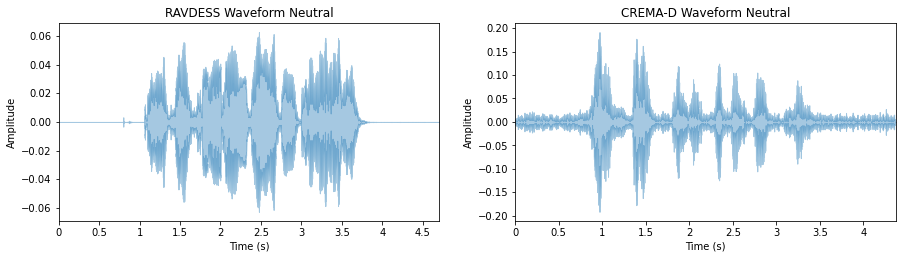

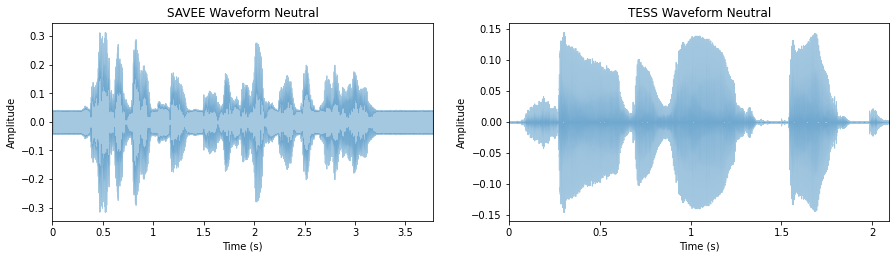

In [5]:
fig = plt.figure(figsize=(15,8))
# WAVEFORM
# display waveform
plt.subplot(2, 2, 1)
librosa.display.waveplot(signal1,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("RAVDESS Waveform "+emotion)

plt.subplot(2, 2, 2)
librosa.display.waveplot(signal2,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("CREMA-D Waveform "+emotion)


fig = plt.figure(figsize=(15,8))
plt.subplot(2, 2, 3)
librosa.display.waveplot(signal3,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("SAVEE Waveform "+emotion)

plt.subplot(2, 2, 4)
librosa.display.waveplot(signal4,sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("TESS Waveform "+emotion)

Text(0.5, 1.0, 'TESS Power spectrum Neutral')

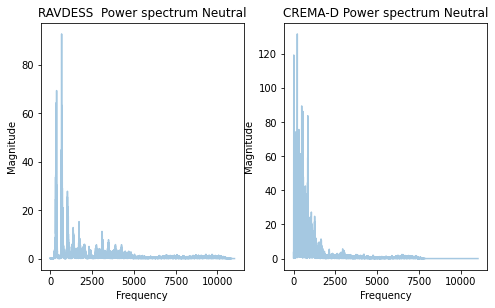

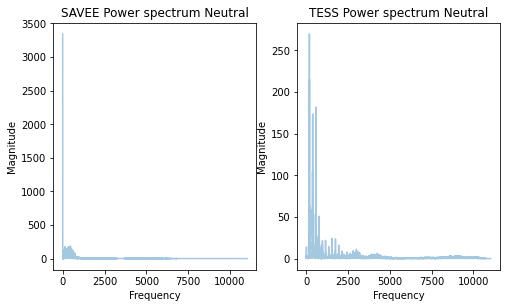

In [6]:
# FFT -> power spectrum
# perform Fourier transform
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)
fft4 = np.fft.fft(signal4)

# calculate abs values on complex numbers to get magnitude
spectrum1 = np.abs(fft1)
spectrum2 = np.abs(fft2)
spectrum3 = np.abs(fft3)
spectrum4 = np.abs(fft4)

# create frequency variable
f1 = np.linspace(0, sample_rate, len(spectrum1))
f2 = np.linspace(0, sample_rate, len(spectrum2))
f3 = np.linspace(0, sample_rate, len(spectrum3))
f4 = np.linspace(0, sample_rate, len(spectrum4))

# take half of the spectrum and frequency
left_spectrum1 = spectrum1[:int(len(spectrum1)/2)]
left_f1 = f1[:int(len(spectrum1)/2)]
# take half of the spectrum and frequency
left_spectrum2 = spectrum2[:int(len(spectrum2)/2)]
left_f2 = f2[:int(len(spectrum2)/2)]
# take half of the spectrum and frequency
left_spectrum3 = spectrum3[:int(len(spectrum3)/2)]
left_f3 = f3[:int(len(spectrum3)/2)]
# take half of the spectrum and frequency
left_spectrum4 = spectrum4[:int(len(spectrum4)/2)]
left_f4 = f4[:int(len(spectrum4)/2)]

fig = plt.figure(figsize=(8,10))
plt.subplot(2, 2, 1)
# plot spectrum
plt.plot(left_f1, left_spectrum1, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("RAVDESS  Power spectrum "+emotion)

plt.subplot(2, 2,2)
# plot spectrum
plt.plot(left_f2, left_spectrum2, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("CREMA-D Power spectrum "+emotion)


fig = plt.figure(figsize=(8,10))

plt.subplot(2, 2, 3)
plt.plot(left_f3, left_spectrum3, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("SAVEE Power spectrum "+emotion)

plt.subplot(2, 2, 4)
plt.plot(left_f4, left_spectrum4, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("TESS Power spectrum "+emotion)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.18575963718820862s


Text(0.5, 1.0, 'TESS Spectrogram Neutral')

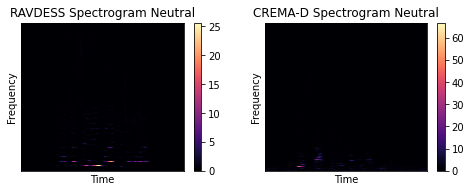

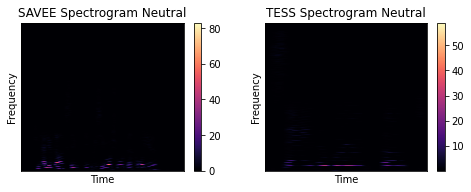

In [7]:
# STFT -> spectrogram
hop_length =256 # in num. of samples
n_fft = 4096 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft1 = librosa.stft(signal1, n_fft=n_fft, hop_length=hop_length)
stft2 = librosa.stft(signal2, n_fft=n_fft, hop_length=hop_length)
stft3 = librosa.stft(signal3, n_fft=n_fft, hop_length=hop_length)
stft4 = librosa.stft(signal4, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram1 = np.abs(stft1)
spectrogram2 = np.abs(stft2)
spectrogram3 = np.abs(stft3)
spectrogram4 = np.abs(stft4)


# display spectrogram


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("RAVDESS Spectrogram "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("CREMA-D Spectrogram "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("SAVEE Spectrogram "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("TESS Spectrogram "+emotion)

In [8]:
log_spectrogram1 = librosa.amplitude_to_db(spectrogram1)
log_spectrogram2 = librosa.amplitude_to_db(spectrogram2)
log_spectrogram3 = librosa.amplitude_to_db(spectrogram3)
log_spectrogram4 = librosa.amplitude_to_db(spectrogram4)

Text(0.5, 1.0, 'TESS Spectogramm (dB) Neutral')

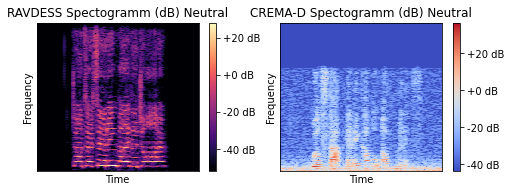

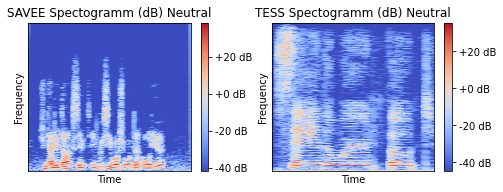

In [9]:
fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(log_spectrogram1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("RAVDESS Spectogramm (dB) "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(log_spectrogram2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("CREMA-D Spectogramm (dB) "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(log_spectrogram3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("SAVEE Spectogramm (dB) "+emotion)

plt.subplot(2, 2, 4)
librosa.display.specshow(log_spectrogram4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("TESS Spectogramm (dB) "+emotion)

Text(0.5, 1.0, 'TESS MFCCs Neutral')

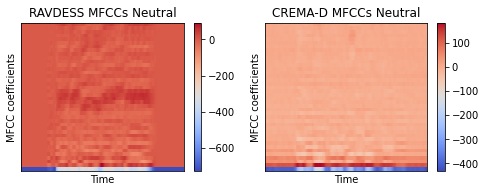

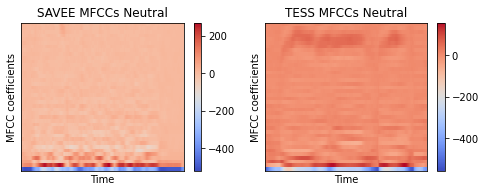

In [10]:
# MFCCs
# extract 13 MFCCs
MFCCs1 = librosa.feature.mfcc(signal1, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs2 = librosa.feature.mfcc(signal2, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs3 = librosa.feature.mfcc(signal3, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)
MFCCs4 = librosa.feature.mfcc(signal4, sample_rate, n_fft=4096, hop_length=256, n_mfcc=40)

# display MFCCs
hop_length=256


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1)
librosa.display.specshow(MFCCs1, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("RAVDESS MFCCs "+emotion)

plt.subplot(2, 2,2)
librosa.display.specshow(MFCCs2, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("CREMA-D MFCCs "+emotion)


fig = plt.figure(figsize=(8,6))
plt.subplot(2, 2, 3)
librosa.display.specshow(MFCCs3, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("SAVEE MFCCs "+emotion)


plt.subplot(2, 2, 4)
librosa.display.specshow(MFCCs4, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("TESS MFCCs "+emotion)

In [11]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)
import numpy as np
X = np.asarray(X)
y = np.asarray(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

#As always we need to expand the dimensions, so we can input the data to NN.
x_traincnn = np.expand_dims(X_train, axis=2) 
x_testcnn = np.expand_dims(X_test, axis=2)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
from tqdm.notebook import tqdm

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [14]:
train_ratio = 0.8
train_len = int(train_ratio*len(lst))
test_len = len(lst) - train_len

train_dataset, test_dataset = torch.utils.data.random_split(lst, (train_len, test_len))

In [15]:
batch_size = 20
valid_size = 0.2
num_workers = 0

# obtain training indices that will be used for validation
num_train = len(train_dataset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
    num_workers=num_workers)

In [16]:
lst_labels = [element[1] for element in lst]
unique_labels = np.unique(np.array(lst_labels))

In [17]:
pd.DataFrame(lst_labels).rename(columns = {0:'label'}).label.value_counts()

3    2167
5    2167
6    2167
1    2047
2    1863
4    1795
0     592
Name: label, dtype: int64

In [18]:
def get_class_distribution_loaders(dataloader_obj, dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    
    for _,j in dataloader_obj:
        for i in j:
            y_idx = i.item()
            y_lbl = idx2class[y_idx]
            count_dict[str(y_lbl)] += 1
            
    return count_dict

In [52]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self, n_input=1, n_output=7, stride=16, n_channel=32):
        super(Net, self).__init__()
        
        self.nn = nn.Sequential(
            #Fully connected layeres and Dropout
            nn.Linear(in_features=40, out_features=256),
            nn.ReLU(),
            nn.Dropout2d(0.25),
            nn.Linear(in_features=256, out_features=512),
            nn.ReLU(),
            nn.Dropout2d(0.25),
            nn.Linear(in_features=512, out_features=n_channel),
        )
        
        #self.linear = F.log_softmax(nn.Linear(n_channel, n_output), dim=1)
        
        self.linear = nn.Linear(n_channel, n_output)

    def forward(self, x):
        embedding = self.nn(x)
        x = F.log_softmax(self.linear(embedding), dim=1)
        return embedding, x

# create a complete CNN
model = Net(n_input = 40, n_output = 7, n_channel = 32)
print(model)

# move tensors to GPU if CUDA is available
train_on_gpu = False
if train_on_gpu:
    model.cuda()

Net(
  (nn): Sequential(
    (0): Linear(in_features=40, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout2d(p=0.25, inplace=False)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout2d(p=0.25, inplace=False)
    (6): Linear(in_features=512, out_features=32, bias=True)
  )
  (linear): Linear(in_features=32, out_features=7, bias=True)
)


In [56]:
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [57]:
# number of epochs to train the model
n_epochs = 500

valid_loss_min = np.Inf # track change in validation loss
min_val_loss = np.Inf
n_epochs_stop = 50
epochs_no_improve = 0
early_stop = False

for epoch in range(n_epochs):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        _, output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        _, output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
        
  # Check early stopping condition
    if valid_loss < min_val_loss:
        #torch.save(model)
        epochs_no_improve = 0
        min_val_loss = valid_loss
    else:
        epochs_no_improve += 1
    if epoch > 5 and epochs_no_improve == n_epochs_stop:
        print('Early stopping!', n_epochs_stop)
        early_stop = True
        break
    if early_stop:
        print("Stopped")
        break
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_emotions_flattening.pt')
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 0.903287 	Validation Loss: 0.990844
Validation loss decreased (inf --> 0.990844).  Saving model ...
Epoch: 1 	Training Loss: 0.905235 	Validation Loss: 0.972792
Validation loss decreased (0.990844 --> 0.972792).  Saving model ...
Epoch: 2 	Training Loss: 0.898063 	Validation Loss: 0.977057
Epoch: 3 	Training Loss: 0.900916 	Validation Loss: 0.984145
Epoch: 4 	Training Loss: 0.901318 	Validation Loss: 0.975436
Epoch: 5 	Training Loss: 0.897183 	Validation Loss: 0.975077
Epoch: 6 	Training Loss: 0.898751 	Validation Loss: 0.967734
Validation loss decreased (0.972792 --> 0.967734).  Saving model ...
Epoch: 7 	Training Loss: 0.896111 	Validation Loss: 0.988692
Epoch: 8 	Training Loss: 0.906793 	Validation Loss: 0.970831
Epoch: 9 	Training Loss: 0.892981 	Validation Loss: 1.013090
Epoch: 10 	Training Loss: 0.895144 	Validation Loss: 0.985229
Epoch: 11 	Training Loss: 0.898431 	Validation Loss: 0.956031
Validation loss decreased (0.967734 --> 0.956031).  Saving model

In [58]:
# track test loss
test_loss = 0.0
nbr_classes = 7
class_correct = list(0. for i in range(nbr_classes))
class_total = list(0. for i in range(nbr_classes))

batch_size = 20
confusion_matrix = torch.zeros(nbr_classes, nbr_classes)

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    _, output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    for t, p in zip(target.view(-1), pred.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(nbr_classes):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.980429

Test Accuracy of     0: 81% (90/111)
Test Accuracy of     1: 57% (231/403)
Test Accuracy of     2: 57% (210/363)
Test Accuracy of     3: 77% (356/459)
Test Accuracy of     4: 58% (216/368)
Test Accuracy of     5: 53% (234/437)
Test Accuracy of     6: 51% (217/419)

Test Accuracy (Overall): 60% (1554/2560)


In [59]:
confusion_matrix

tensor([[ 90.,   4.,   8.,   5.,   0.,   1.,   3.],
        [  0., 231.,  53.,  27.,  17.,  46.,  29.],
        [  4.,  26., 210.,  38.,  30.,  28.,  27.],
        [  2.,  17.,  29., 356.,  15.,   2.,  38.],
        [  2.,  32.,  58.,  15., 216.,  29.,  16.],
        [  5.,  74.,  71.,   8.,  39., 234.,   6.],
        [  8.,  34.,  46.,  82.,  22.,  10., 217.]])

In [60]:
labels_dict

{0: 'Surprised',
 1: 'Fearful',
 2: 'Disgusted',
 3: 'Angry',
 4: 'Neutral',
 5: 'Sad',
 6: 'Happy'}

In [61]:
path = '/kaggle/input/audio-tests'
lst_samples = []
i = -2
start_time = time.time()

for subdir, dirs, files in os.walk(path):
  i=i+1
  print(subdir)
  print(i)
  for file in files:

        #Load librosa array, obtain mfcss, add them to array and then to list.
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_fft=4096, hop_length=256, n_mfcc=40).T,axis=0) 
        arr = mfccs
        lst_samples.append(arr) #Here we append the MFCCs to our list.


/kaggle/input/audio-tests
-1


In [65]:
batch_size = 1
valid_size = 0.2
num_workers = 0

samples_loader = torch.utils.data.DataLoader(lst_samples, batch_size=batch_size, 
    num_workers=num_workers)

In [66]:
_, output = model(torch.tensor(lst_samples))
_, pred = torch.max(output, 1) 

In [67]:
pred

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6])